In [ ]:
#Importing the necessary libraries
import tensorflow as tf
from tensorflow.keras.layers import Layer,Dense, Flatten,Dropout,Lambda,Input
from tensorflow.keras.models import Model
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [ ]:
#Importing the dataset from tensorflow
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
#Verifying the size,shape of the input data
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [ ]:
#Given that the original data provides training and test sets,a validation set is also prepared

'''
Splitting up the original dataset into training and validaton sets in ratio 90:10
random state is set to a particular number so that results are consistent with each iteration of program running
'''

train_x,val_x,train_y,val_y=train_test_split(x_train,y_train, test_size=0.1, random_state=27, shuffle=True)

In [ ]:
#Given that the input images in the RGB channels have pixel values from 0 to 255,normalization is done
#Normalizing the data
train_x=train_x/255.0
val_x=val_x/255.0
x_test=x_test/255.0

#One hot encoding the labels into corresponding vectors
train_y=tf.keras.utils.to_categorical(train_y)
val_y=tf.keras.utils.to_categorical(val_y)

print("train_x.shape", train_x.shape)
print("val_x.shape", val_x.shape)
print("train_y.shape",train_y.shape)
print("val_y.shape", val_y.shape)

train_x.shape (54000, 28, 28)
val_x.shape (6000, 28, 28)
train_y.shape (54000, 10)
val_y.shape (6000, 10)


In [ ]:
#Instantiate the ImageDataGenerator class for the training and validation sets
train_datagen = ImageDataGenerator()
val_datagen = ImageDataGenerator()

In [ ]:
#creation of Quadratic,Cubic,Quartic neurons

class Quadratic_Dense(Layer):

  def __init__(self,units=16,activation=None):
    super(Quadratic_Dense,self).__init__()
    self.units=units
    self.activation=tf.keras.activations.get(activation)

  def build(self,input_shape):
    a=tf.random_normal_initializer()
    b=tf.random_normal_initializer()
    c=tf.zeros_initializer()

    self.a=self.add_weight(name='a',shape=(input_shape[-1],self.units),dtype='float32',initializer=a,trainable=True)

    self.b=self.add_weight(name='b',shape=(input_shape[-1],self.units),dtype='float32',initializer=b,trainable=True)

    self.c=self.add_weight(name='c',shape=(self.units,),dtype='float32',initializer=c,trainable=True)

  def call(self,inputs):
    self.x_2=tf.math.square(inputs)
    self.value=tf.matmul(self.x_2,self.a)+tf.matmul(inputs,self.b)+self.c
    return self.activation(self.value)

####################################################
class Cubic_Dense(Layer):

  def __init__(self,units=16,activation=None):
    super(Cubic_Dense,self).__init__()
    self.units=units
    self.activation=tf.keras.activations.get(activation)

  def build(self,input_shape):
    a=tf.random_normal_initializer()
    b=tf.random_normal_initializer()
    c=tf.random_normal_initializer()
    d=tf.zeros_initializer()


    self.a=self.add_weight(name='a',shape=(input_shape[-1],self.units),dtype='float32',initializer=a,trainable=True)

    self.b=self.add_weight(name='b',shape=(input_shape[-1],self.units),dtype='float32',initializer=b,trainable=True)

    self.c=self.add_weight(name='c',shape=(input_shape[-1],self.units),dtype='float32',initializer=c,trainable=True)

    self.d=self.add_weight(name='d',shape=(self.units,),dtype='float32',initializer=d,trainable=True)

  def call(self,inputs):
    self.x_2=tf.math.square(inputs)
    self.x_3=tf.math.pow(inputs,3)
    self.value=tf.matmul(self.x_3,self.a)+tf.matmul(self.x_2,self.b)+tf.matmul(inputs,self.b)+self.d
    return self.activation(self.value)

####################################################
class Quartic_Dense(Layer):

  def __init__(self,units=16,activation=None):
    super(Quartic_Dense,self).__init__()
    self.units=units
    self.activation=tf.keras.activations.get(activation)

  def build(self,input_shape):
    a=tf.random_normal_initializer()
    b=tf.random_normal_initializer()
    c=tf.random_normal_initializer()
    d=tf.random_normal_initializer()
    e=tf.zeros_initializer()

    self.a=self.add_weight(name='a',shape=(input_shape[-1],self.units),dtype='float32',initializer=a,trainable=True)

    self.b=self.add_weight(name='b',shape=(input_shape[-1],self.units),dtype='float32',initializer=b,trainable=True)

    self.c=self.add_weight(name='c',shape=(input_shape[-1],self.units),dtype='float32',initializer=c,trainable=True)

    self.d=self.add_weight(name='d',shape=(input_shape[-1],self.units),dtype='float32',initializer=d,trainable=True)

    self.e=self.add_weight(name='e',shape=(self.units,),dtype='float32',initializer=e,trainable=True)

  def call(self,inputs):
    self.x_2=tf.math.square(inputs)
    self.x_3=tf.math.pow(inputs,3)
    self.x_4=tf.math.pow(inputs,4)
    self.value=tf.matmul(self.x_4,self.a)+tf.matmul(self.x_3,self.b)+tf.matmul(self.x_2,self.c)+tf.matmul(inputs,self.d)+self.e
    return self.activation(self.value)

####################################################


In [ ]:
'''
Definition of the model architectures is as below:

Dense_Model:Typical model architecture where the dense layer is linear i.e, output=w1.x +b

Quadratic_Model:Typical model architecture where the dense layer is quadratic i.e, output=w1.x^2 + w2.x +b

Cubic_Model:Typical model architecture where the dense layer is cubic i.e, output=w1.x^3 + w2.x^2 + w3.x +b

Quartic_Model:Typical model architecture where the dense layer is biquadratic i.e, output=w1.x^4 + w2.x^3 + w3.x^2 + w4.x +b
'''

def Dense_Model():
  input_layer=Input(shape=(28,28))

  flatten_layer=Flatten()(input_layer)
  Dense_1=Dense(units=64,activation='relu')(flatten_layer)
  Dense_2=Dense(units=64,activation='relu')(Dense_1)
  layer=Dropout(0.15)(Dense_2)
  output=Dense(units=10,activation='softmax')(layer)

  return Model(inputs=input_layer,outputs=output)

def Quadratic_Model():
  input_layer=Input(shape=(28,28))

  flatten_layer=Flatten()(input_layer)
  Dense_1=Quadratic_Dense(units=64,activation='relu')(flatten_layer)
  Dense_2=Quadratic_Dense(units=64,activation='relu')(Dense_1)
  layer=Dropout(0.15)(Dense_2)

  output=Quadratic_Dense(units=10,activation='softmax')(layer)

  return Model(inputs=input_layer,outputs=output)

def Cubic_Model():
  input_layer=Input(shape=(28,28))

  flatten_layer=Flatten()(input_layer)
  Dense_1=Cubic_Dense(units=64,activation='relu')(flatten_layer)
  Dense_2=Cubic_Dense(units=64,activation='relu')(Dense_1)
  layer=Dropout(0.15)(Dense_2)

  output=Cubic_Dense(units=10,activation='softmax')(layer)

  return Model(inputs=input_layer,outputs=output)

def Quartic_Model():
  input_layer=Input(shape=(28,28))

  flatten_layer=Flatten()(input_layer)
  Dense_1=Quartic_Dense(units=64,activation='relu')(flatten_layer)
  Dense_2=Quartic_Dense(units=64,activation='relu')(Dense_1)
  layer=Dropout(0.15)(Dense_2)

  output=Quartic_Dense(units=10,activation='softmax')(layer)

  return Model(inputs=input_layer,outputs=output)



In [ ]:
m1=Dense_Model()
m1.compile(optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'],loss='categorical_crossentropy')

m2=Quadratic_Model()
m2.compile(optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'],loss='categorical_crossentropy')

m3=Cubic_Model()
m3.compile(optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'],loss='categorical_crossentropy')

m4=Quartic_Model()
m4.compile(optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'],loss='categorical_crossentropy')

In [ ]:
#Conduction of the training
linear_history = m1.fit(
      train_x,train_y,
      epochs=15,
      verbose=1,
      validation_data=(val_x,val_y),
      )

Epoch 1/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8343 - loss: 0.5471 - val_accuracy: 0.9522 - val_loss: 0.1692
Epoch 2/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9526 - loss: 0.1563 - val_accuracy: 0.9622 - val_loss: 0.1299
Epoch 3/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9667 - loss: 0.1112 - val_accuracy: 0.9663 - val_loss: 0.1259
Epoch 4/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9740 - loss: 0.0866 - val_accuracy: 0.9658 - val_loss: 0.1165
Epoch 5/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9754 - loss: 0.0766 - val_accuracy: 0.9698 - val_loss: 0.1031
Epoch 6/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9803 - loss: 0.0622 - val_accuracy: 0.9727 - val_loss: 0.1139
Epoch 7/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9830 - loss: 0.0517 - val_accuracy: 0.9717 - val_loss: 0.1040
Epoch 8/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9854 - loss: 0.0465 -

In [ ]:
quad_history = m2.fit(
      train_x,train_y,
      epochs=15,
      verbose=1,
      validation_data=(val_x,val_y),
      )

Epoch 1/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8418 - loss: 0.5417 - val_accuracy: 0.9515 - val_loss: 0.1829
Epoch 2/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9536 - loss: 0.1614 - val_accuracy: 0.9553 - val_loss: 0.1554
Epoch 3/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9643 - loss: 0.1245 - val_accuracy: 0.9603 - val_loss: 0.1571
Epoch 4/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9711 - loss: 0.0967 - val_accuracy: 0.9657 - val_loss: 0.1417
Epoch 5/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9737 - loss: 0.0883 - val_accuracy: 0.9637 - val_loss: 0.1472
Epoch 6/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9763 - loss: 0.0811 - val_accuracy: 0.9623 - val_loss: 0.1656
Epoch 7/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9751 - loss: 0.0859 - val_accuracy: 0.9643 - val_loss: 0.1701
Epoch 8/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9792 - loss: 0.0763 -

In [ ]:
cubic_history = m3.fit(
      train_x,train_y,
      epochs=15,
      verbose=1,
      validation_data=(val_x,val_y),
      )

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:678: UserWarning: Gradients do not exist for variables ['c', 'c', 'c'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6777 - loss: 1.4103 - val_accuracy: 0.7545 - val_loss: 0.8923
Epoch 2/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7695 - loss: 1.0676 - val_accuracy: 0.8220 - val_loss: 0.6658
Epoch 3/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8224 - loss: 0.6773 - val_accuracy: 0.8797 - val_loss: 0.5109
Epoch 4/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8551 - loss: 0.8449 - val_accuracy: 0.8252 - val_loss: 0.6359
Epoch 5/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8160 - loss: 0.7569 - val_accuracy: 0.8493 - val_loss: 0.5974
Epoch 6/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8725 - loss: 0.5020 - val_accuracy: 0.8832 - val_loss: 0.4698
Epoch 7/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8802 - loss: 0.5050 - val_accuracy: 0.9007 - val_loss: 0.9935
Epoch 8/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8984 - loss: 0.5024 - val_accur

In [ ]:
quartic_history = m4.fit(
      train_x,train_y,
      epochs=15,
      verbose=1,
      validation_data=(val_x,val_y),
      )

Epoch 1/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.1837 - loss: 3959.5593 - val_accuracy: 0.1667 - val_loss: 2.3033
Epoch 2/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.1678 - loss: 162.1477 - val_accuracy: 0.1603 - val_loss: 2.2092
Epoch 3/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.1848 - loss: 231.2990 - val_accuracy: 0.1833 - val_loss: 2.6314
Epoch 4/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.2429 - loss: 9.4014 - val_accuracy: 0.2793 - val_loss: 1.9220
Epoch 5/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.2845 - loss: 8.9453 - val_accuracy: 0.2658 - val_loss: 1.9496
Epoch 6/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.2540 - loss: 2.4518 - val_accuracy: 0.2622 - val_loss: 1.8974
Epoch 7/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.2780 - loss: 4.5362 - val_accuracy: 0.2860 - val_loss: 1.8355
Epoch 8/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.2787 - los

In [ ]:
'''
Function that plots the loss and accuracy for both training and validation
'''

def accuracy_plotter(v1,v2,v3,v4):
  plt.style.use('dark_background')
  epochs = range(len(v1.history['accuracy']))

  #Below section of code is for the accuracy graph
  plt.plot(epochs, v1.history['accuracy'],'r',linewidth=3, label='Linear',marker='o')
  plt.plot(epochs, v2.history['accuracy'],'b',linewidth=3, label='quadratic',marker='o')
  plt.plot(epochs, v3.history['accuracy'],'g',linewidth=3, label='Cubic',marker='o')
  plt.plot(epochs, v4.history['accuracy'],'y',linewidth=3, label='Quartic',marker='o')

  plt.xlabel('Number of epochs')
  plt.ylabel('Numerical Value')
  plt.title('Training Accuracy')
  plt.legend()
  plt.figure()

  #Below section of code is for the validation graph
  plt.plot(epochs, v1.history['val_accuracy'],'r',linewidth=3, label='Linear',marker='o')
  plt.plot(epochs, v2.history['val_accuracy'],'b',linewidth=3, label='quadratic',marker='o')
  plt.plot(epochs, v3.history['val_accuracy'],'g',linewidth=3, label='Cubic',marker='o')
  plt.plot(epochs, v4.history['val_accuracy'],'y',linewidth=3, label='Quartic',marker='o')

  plt.xlabel('Number of epochs')
  plt.ylabel('Numerical Value')
  plt.title('Validation Accuracy')
  plt.legend()
  plt.figure()

  plt.show()

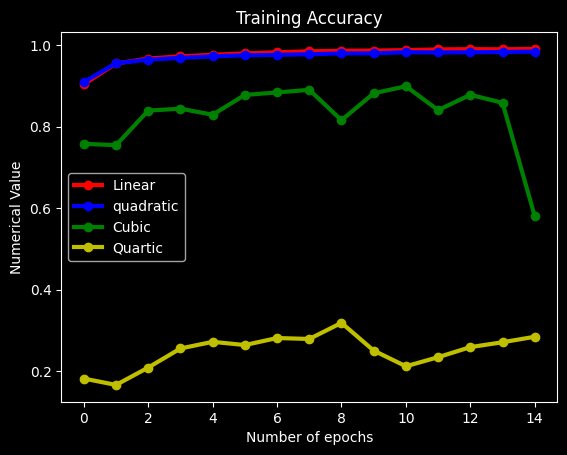

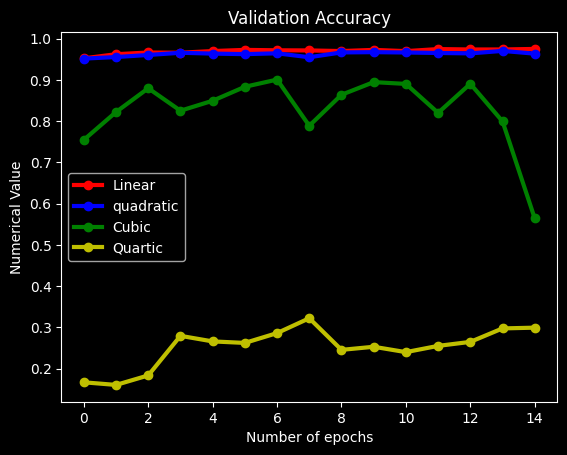

<Figure size 640x480 with 0 Axes>

In [ ]:
#Plots the above details based on training outputs
accuracy_plotter(v1=linear_history,v2=quad_history,v3=cubic_history,v4=quartic_history)

In [ ]:
from sklearn.metrics import accuracy_score

'''
pi where i belongs to (1,4) represent the predictions of the models with respect to the test dataset defined earlier
The corresponding y_hats refer to the class for which the probability is the highest

'''
#Creating the predictions from the test set for each of the models
y_hat_linear=np.argmax(m1.predict(x_test,verbose=1),axis=-1)
y_hat_quad=np.argmax(m2.predict(x_test,verbose=1),axis=-1)
y_hat_cubic=np.argmax(m3.predict(x_test,verbose=1),axis=-1)
y_hat_quar=np.argmax(m4.predict(x_test,verbose=1),axis=-1)

#Checking Accuracy with the test data
print(f'Test Data accuracy based on linear neuron is :{accuracy_score(y_test, y_hat_linear)*100} ')
print(f'Test Data accuracy based on quadratic neuron is :{accuracy_score(y_test, y_hat_quad)*100} ')
print(f'Test Data accuracy based on cubic neuron is :{accuracy_score(y_test, y_hat_cubic)*100} ')
print(f'Test Data accuracy based on quartic neuron is :{accuracy_score(y_test, y_hat_quar)*100} ')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Test Data accuracy based on linear neuron is :97.68 
Test Data accuracy based on quadratic neuron is :96.54 
Test Data accuracy based on cubic neuron is :55.57 
Test Data accuracy based on quartic neuron is :30.220000000000002 


In [ ]:
#creation of a classification report

from sklearn.metrics import classification_report
print('the stats for the model with the linear neuron are as follows:')
print(classification_report(y_test, y_hat_linear))

print('the stats for the model with the quadratic neuron are as follows:')
print(classification_report(y_test, y_hat_quad))

print('the stats for the model with the cubic neuron are as follows:')
print(classification_report(y_test, y_hat_cubic))

print('the stats for the model with the quartic neuron are as follows:')
print(classification_report(y_test, y_hat_quar))

the stats for the model with the linear neuron are as follows:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.98      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.97       892
           6       0.99      0.98      0.98       958
           7       0.97      0.98      0.97      1028
           8       0.96      0.97      0.97       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

the stats for the model with the quadratic neuron are as follows:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
###Progress Check Point####
#Given that the results for quadratic,linear types of neurons have similar
# results, adversarial training will be carried out for them
'''
Function that returns the gradient of the input image
'''
loss_instance=tf.keras.losses.CategoricalCrossentropy()
def adversary_creator(input_image,input_label,model_name):

  input_image = tf.cast(input_image, dtype=tf.float32)
  input_label = tf.cast(input_label, dtype=tf.float32)
  input_image=tf.expand_dims(input_image, axis=0)#change to (1,28,28)
  input_image=tf.expand_dims(input_image,axis=-1)#change to (1,28,28,1)

  with tf.GradientTape(persistent=True) as tape:
      tape.watch(input_image)
      prediction = model_name(input_image)
      loss = loss_instance(input_label, prediction)

  gradient = tape.gradient(loss, input_image)
  sign_gradient = tf.sign(gradient)

  return sign_gradient.numpy()


In [ ]:
# Create a single adversarial example

import random
import matplotlib.pyplot as plt
from matplotlib.image import imread

q=train_x[0]
print(q.shape)
q1=tf.cast(q,dtype=tf.float32)
#q.reshape(1,28,28,1)
w=train_y[0]
print(q1.shape)
print(train_y[0].shape)
#eth=q.reshape(-1)

perturbations = adversary_creator(q,w,m1)
#adv_q = q + perturbations * 0.01

"""
# Reshape and visualize the adversarial example
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(q.reshape(28, 28), cmap='gray')  # Assuming input images are 28x28
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Adversarial Image')
plt.imshow(adv_q.reshape(28, 28), cmap='gray')
plt.axis('off')

plt.show()


# Optionally print predictions
print('Prediction for original image:', np.argmax(m1.predict(q.reshape(1, 28, 28, 1))))
print('Prediction for adversarial image:', np.argmax(m1.predict(adv_q.reshape(1, 28, 28, 1))))
"""



(28, 28)
(28, 28)
(10,)


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(10,), output.shape=(1, 10)

In [ ]:
train_x[0].shape
#qq=train_x[0].reshape(-1)
#qq.shape

(28, 28)

In [ ]:
alpha=m1(train_x[0:10]).numpy()
beta=np.argmax(alpha,axis=-1)
print(beta)

[8 1 6 9 8 0 2 1 0 1]


In [ ]:
m1(train_x[0][0])

ValueError: Exception encountered when calling layer 'model' (type Functional).

Input 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 784, but received input with shape (28, 1)

Call arguments received by layer 'model' (type Functional):
  • inputs=tf.Tensor(shape=(28,), dtype=float64)
  • training=None
  • mask=None